In [60]:
# 📘 1. Impor Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [61]:
#  2. Load Dataset
df = pd.read_excel ("databagus.xlsx")
df.head()

,NO,NISN,NAMA,PABP,PKN,Ketrampilan,IND,Ketrampilan.1,MTK,Ketrampilan.2,...,Ketrampilan.4,ING,Ketrampilan.5,SBD,Ketrampilan.6,PJOK,Ketrampilan.7,PRA,Ketrampilan.8,SUN
0,2.0,3519.0,ALLY ILHAM,92.5,95,Kompetensi Memahami gerak spesifik dalam berb...,84.3,"Kompetensi Menganalisis konsep suhu, pemuaian...",73,"Kompetensi Menjelaskan himpunan, himpunan bag...",...,Kompetensi memahami ketentuan bersuci dari ha...,89.5,Kompetensi memahami konsep dasar bernyanyi sa...,96.1,Kompetensi Memahami struktur teks dan unsur k...,91.3,Kompetensi Menganalisis kesejarahan perumusan...,76.2,"Kompetensi \tmemahami rancangan pembuatan, pe...",89.1
1,3.0,3520.0,ANDINI APRILIA SARI,92.5,95,Kompetensi Memahami gerak spesifik dalam berb...,84.3,Kompetensi Menerapkan konsep pengukuran berba...,73,"Kompetensi Menjelaskan himpunan, himpunan bag...",...,Kompetensi memahami ketentuan bersuci dari ha...,89.5,Kompetensi memahami konsep dasar bernyanyi sa...,96.1,Kompetensi Memahami struktur teks dan unsur k...,91.3,Kompetensi Memahami norma-norma yang berlaku ...,76.2,"Kompetensi \tmemahami rancangan pembuatan, pe...",89.1
2,4.0,3521.0,ASHELA SESYA INDYRA,91.4,82,Kompetensi Memahami gerak spesifik dalam berb...,90.1,Kompetensi Menerapkan konsep pengukuran berba...,77,"Kompetensi Menjelaskan himpunan, himpunan bag...",...,Kompetensi memahami ketentuan bersuci dari ha...,80.9,Kompetensi memahami konsep dasar bernyanyi sa...,87.9,Kompetensi Memahami struktur teks dan unsur k...,90.3,Kompetensi Memahami norma-norma yang berlaku ...,85.5,"Kompetensi \tmemahami rancangan pembuatan, pe...",86.3
3,5.0,3522.0,ASILAH NAILA ALIFA,81.4,92,Kompetensi Memahami gerak spesifik dalam berb...,82.2,Kompetensi Menerapkan konsep pengukuran berba...,72,"Kompetensi Menjelaskan himpunan, himpunan bag...",...,Kompetensi memahami ketentuan bersuci dari ha...,77.9,"Kompetensi memahami unsur, prinsip, teknik da...",91.3,Kompetensi Memahami struktur teks dan unsur k...,89.3,Kompetensi Memahami norma-norma yang berlaku ...,84.1,"Kompetensi \tmemahami rancangan pembuatan, pe...",84.4
4,6.0,3523.0,AURORA ALUNA DIMITRI,86.9,76,Kompetensi Memahami gerak spesifik dalam berb...,88.0,Kompetensi Menerapkan konsep pengukuran berba...,70,"Kompetensi Menjelaskan himpunan, himpunan bag...",...,Kompetensi memahami ketentuan bersuci dari ha...,100.0,"Kompetensi memahami unsur, prinsip, teknik da...",91.6,Kompetensi Memahami struktur teks dan unsur k...,92.4,Kompetensi Memahami norma-norma yang berlaku ...,78.4,"Kompetensi \tmemahami rancangan pembuatan, pe...",87.9


In [62]:
#  3. Eksplorasi Awal
print(" Info Data:")
print(df.info())
print("\n Statistik Deskriptif:")
print(df.describe())
print("\n Cek Nilai Kosong:")
print(df.isnull().sum())

 Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             500 non-null    float64
 1   NISN           500 non-null    float64
 2   NAMA           500 non-null    object 
 3   PABP           501 non-null    float64
 4   PKN            501 non-null    int64  
 5   Ketrampilan    500 non-null    object 
 6   IND            501 non-null    float64
 7   Ketrampilan.1  500 non-null    object 
 8   MTK            501 non-null    int64  
 9   Ketrampilan.2  500 non-null    object 
 10  IPA            501 non-null    int64  
 11  Ketrampilan.3  500 non-null    object 
 12  IPS            501 non-null    int64  
 13  Ketrampilan.4  500 non-null    object 
 14  ING            501 non-null    float64
 15  Ketrampilan.5  500 non-null    object 
 16  SBD            501 non-null    float64
 17  Ketrampilan.6  500 non-null    object 
 18

In [63]:
# 🧹 4. Prapemrosesan
# Hapus kolom yang tidak relevan jika ada
kolom_hapus = ['NO', 'NISN', 'NAMA', 'Ketrampilan', 'Ketrampilan.1', 'Ketrampilan.2', 'Ketrampilan.3', 'Ketrampilan.4', 'Ketrampilan.5', 'Ketrampilan.6', 'Ketrampilan.7', 'Ketrampilan.8']
for kolom in kolom_hapus:
    if kolom in df.columns:
        df = df.drop(columns=[kolom])

# Hapus baris duplikat jika ada
df = df.drop_duplicates()

# Jika ada nilai kosong, isi dengan median
df = df.fillna(df.median(numeric_only=True))
df

,PABP,PKN,IND,MTK,IPA,IPS,ING,SBD,PJOK,PRA,SUN
0,92.5,95,84.3,73,75,88,89.5,96.1,91.3,76.2,89.1
2,91.4,82,90.1,77,79,83,80.9,87.9,90.3,85.5,86.3
3,81.4,92,82.2,72,93,93,77.9,91.3,89.3,84.1,84.4
4,86.9,76,88.0,70,77,86,100.0,91.6,92.4,78.4,87.9
5,87.0,82,83.5,86,94,80,80.8,97.4,92.0,75.7,85.8
...,...,...,...,...,...,...,...,...,...,...,...
496,88.9,77,79.3,81,82,83,79.7,90.7,95.6,76.6,91.3
497,100.0,93,83.0,93,85,84,88.4,92.3,92.6,77.5,89.6
498,92.8,76,80.9,81,92,90,84.3,88.0,99.9,93.7,92.1
499,88.9,95,95.2,75,89,95,80.3,88.4,98.0,82.6,86.7


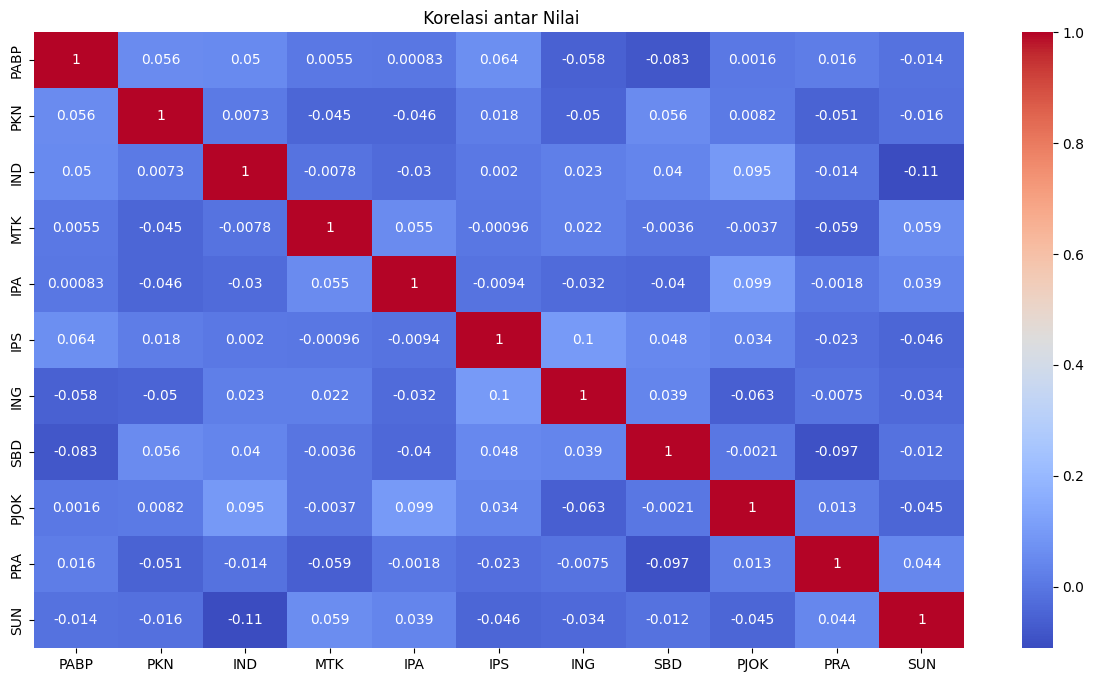

In [64]:
#  5. Visualisasi Korelasi
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title(" Korelasi antar Nilai")
plt.show()

In [65]:
# Konversi kolom ke numerik, jika ada nilai tak bisa dikonversi, ubah jadi NaN
df['IPA'] = pd.to_numeric(df['IPA'], errors='coerce')
df['MTK'] = pd.to_numeric(df['MTK'], errors='coerce')
df['IPS'] = pd.to_numeric(df['IPS'], errors='coerce')
df['PKN'] = pd.to_numeric(df['PKN'], errors='coerce')

# Setelah semua kolom bertipe numerik, baru bisa hitung jurusan
df['jurusan'] = ((df['IPA'] + df['MTK']) > (df['IPS'] + df['PKN'])).astype(int)
df['jurusan'] = df['jurusan'].map({1: 'IPA', 0: 'IPS'})

df

,PABP,PKN,IND,MTK,IPA,IPS,ING,SBD,PJOK,PRA,SUN,jurusan
0,92.5,95,84.3,73,75,88,89.5,96.1,91.3,76.2,89.1,IPS
2,91.4,82,90.1,77,79,83,80.9,87.9,90.3,85.5,86.3,IPS
3,81.4,92,82.2,72,93,93,77.9,91.3,89.3,84.1,84.4,IPS
4,86.9,76,88.0,70,77,86,100.0,91.6,92.4,78.4,87.9,IPS
5,87.0,82,83.5,86,94,80,80.8,97.4,92.0,75.7,85.8,IPA
...,...,...,...,...,...,...,...,...,...,...,...,...
496,88.9,77,79.3,81,82,83,79.7,90.7,95.6,76.6,91.3,IPA
497,100.0,93,83.0,93,85,84,88.4,92.3,92.6,77.5,89.6,IPA
498,92.8,76,80.9,81,92,90,84.3,88.0,99.9,93.7,92.1,IPA
499,88.9,95,95.2,75,89,95,80.3,88.4,98.0,82.6,86.7,IPS


In [66]:
#  7. Pisahkan Fitur dan Label
X = df[['IPA', 'IPS', 'PKN', 'MTK']]
y = df['jurusan'].map({'IPA': 1, 'IPS': 0})  # Ubah label ke biner

#  8. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32)
df

,PABP,PKN,IND,MTK,IPA,IPS,ING,SBD,PJOK,PRA,SUN,jurusan
0,92.5,95,84.3,73,75,88,89.5,96.1,91.3,76.2,89.1,IPS
2,91.4,82,90.1,77,79,83,80.9,87.9,90.3,85.5,86.3,IPS
3,81.4,92,82.2,72,93,93,77.9,91.3,89.3,84.1,84.4,IPS
4,86.9,76,88.0,70,77,86,100.0,91.6,92.4,78.4,87.9,IPS
5,87.0,82,83.5,86,94,80,80.8,97.4,92.0,75.7,85.8,IPA
...,...,...,...,...,...,...,...,...,...,...,...,...
496,88.9,77,79.3,81,82,83,79.7,90.7,95.6,76.6,91.3,IPA
497,100.0,93,83.0,93,85,84,88.4,92.3,92.6,77.5,89.6,IPA
498,92.8,76,80.9,81,92,90,84.3,88.0,99.9,93.7,92.1,IPA
499,88.9,95,95.2,75,89,95,80.3,88.4,98.0,82.6,86.7,IPS


In [67]:
# ⚖️ 9. Normalisasi (Standarisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[ 0.27229984,  0.97886777,  1.64963691,  0.00195476],
       [-0.5528512 ,  0.61087237, -1.36187063, -1.22675278],
       [-0.05776057, -1.59710005,  0.98041301,  0.56045819],
       [ 1.59254151, -1.22910465,  1.48233093, -0.89165072],
       [ 1.26248109, -1.59710005,  0.31118911,  0.33705682],
       [-0.71788141,  1.34686317, -1.36187063,  0.22535613],
       [ 1.26248109,  1.71485858,  0.47849509,  0.67215888],
       [ 0.43733005, -0.67711154,  0.98041301,  0.11365545],
       [-0.22279078,  0.61087237,  0.14388314, -0.44484798],
       [-1.70806266,  0.42687467, -0.35803479,  0.89556025],
       [ 1.4275113 ,  1.34686317, -1.02725868,  0.22535613],
       [ 1.26248109,  0.97886777,  0.14388314,  0.67215888],
       [ 1.59254151, -1.22910465, -0.35803479,  0.78385956],
       [ 1.59254151,  1.71485858,  0.47849509,  1.45406368],
       [-0.05776057, -0.86110924, -1.52917661,  0.67215888],
       [ 0.60236026,  0.79487007, -1.36187063, -0.77995004],
       [-1.54303245,  0.

In [82]:
# 🧠 10. Membangun ANN
model = Sequential([
    Dense(8, input_dim=4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🚀 11. Melatih Model
history = model.fit(X_train_scaled, y_train, epochs=63,
                    validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6759 - loss: 0.5965 - val_accuracy: 0.6800 - val_loss: 0.5847
Epoch 2/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6563 - loss: 0.5825 - val_accuracy: 0.6800 - val_loss: 0.5689
Epoch 3/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6655 - loss: 0.5581 - val_accuracy: 0.6800 - val_loss: 0.5542
Epoch 4/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6608 - loss: 0.5475 - val_accuracy: 0.6800 - val_loss: 0.5410
Epoch 5/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6610 - loss: 0.5268 - val_accuracy: 0.6900 - val_loss: 0.5286
Epoch 6/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6750 - loss: 0.5113 - val_accuracy: 0.6900 - val_loss: 0.5163
Epoch 7/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8065 - loss: 0.4994 - val_accuracy: 0.7800 - val_loss: 0.5038
Epoch 8/63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8352 - loss: 0.4767 - val_accuracy: 0.8000 - v

In [83]:
# 📈 12. Evaluasi Model
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"🎯 Akurasi pada data uji: {acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9724 - loss: 0.0834
🎯 Akurasi pada data uji: 0.97


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


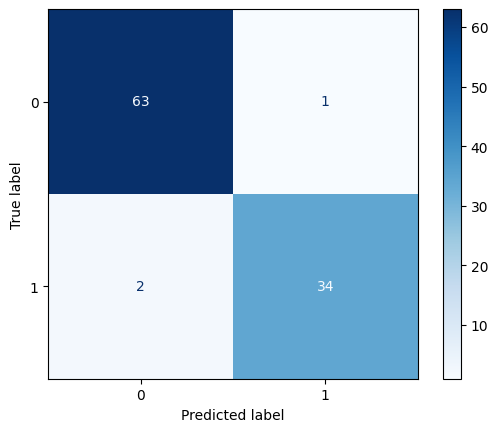

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🔮 Prediksi terhadap data uji
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Konversi ke 0 atau 1

# 📊 Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 🎨 Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Bisa ganti cmap sesuai selera


C:\Users\alibi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


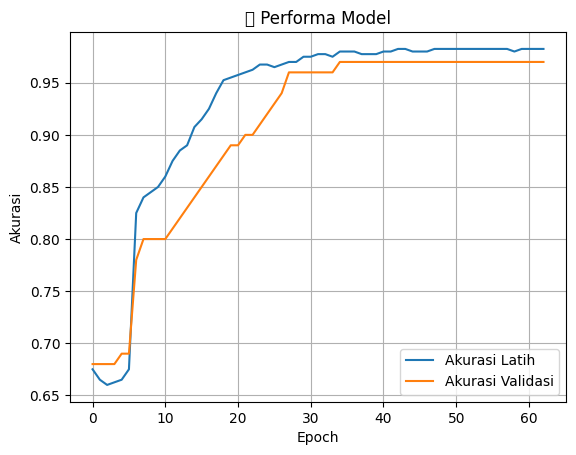

In [85]:
# 📊 13. Visualisasi Akurasi dan Loss
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('📉 Performa Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# 💾 14. Simpan Model dan Scaler
model.save("model_ann_jurusan.h5")
joblib.dump(scaler, "scaler_jurusan.pkl")

['scaler_jurusan.pkl']

In [90]:
# 🔍 15. Fungsi Prediksi Individu
def prediksi_jurusan(ipa, ips, pkn, mtk):
    input_data = np.array([[ipa, ips, pkn, mtk]])
    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)[0][0]
    return "IPA" if pred >= 0.5 else "IPS"

# 🎓 Coba Prediksi
print(prediksi_jurusan(ipa=80, ips=80, pkn=80, mtk=80))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
IPS


c:\Users\alibi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
